# WEB SCRAPING, DATA ANALYSIS, AND VISUALIZATION

Writer: Siti Zarina

Date: 17/02/2022





Crawl all the unique URLs for the detailed publication pages

In [1]:
# STEP 1: REQUEST PERMISSION, CREATE SOUP OBJECT, FIND PUBLICATION PAGE URL

# Importing libraries 

import requests
from bs4 import BeautifulSoup

# Requesting information from the main website
url = "https://community.dur.ac.uk/hubert.shum/comp42315/index.htm"
webpage_response = requests.get(url)
webpage_content = webpage_response.content

# Creating BeautifulSoup object
soup = BeautifulSoup(webpage_content, "html.parser")

print(soup.text)




Hubert P. H. Shum | COMP42315 Assignment Site for Crawling





 














HOMEto discover
PUBLICATIONSto innovate






COMP42315 Assignment Site for Crawling
Dr Hubert P. H. Shum - SMIEEE, FHEA, PhD, MSc, BEng
Associate Professor in Computer Science
	  Durham University
Research Interests: 
		Computer Vision, Computer Graphics, Motion Analysis, Machine Learning
		



			Durham Profile
			


			Google Scholar
			


			YouTube
			


			LinkedIn
			


			Twitter
			


			GitHub
			


Email


Joining Us
If you  aspire to develop yourself and  conduct high-quality research, do explore joining us as a PhD student, a visiting/internship student, or an academic visitor. My team has a supportive culture with members coming from different countries. Past members have developed successful research and have enjoyed their vibrant lifes in the UK.


Biography


Dr Hubert P. H. Shum an Associate Professor in Computer Science at Durham University. Before this, he worked as the Director of Re

In [2]:
# Finding a link to the publication page

domain = "https://community.dur.ac.uk/hubert.shum/comp42315/"

# Getting href content embedded within a tag
home_link = soup.a 

# Using next sibling twice to get the publication url 
# as its located on the second level of the a tag
pub_link = domain + home_link.next_sibling.next_sibling["href"] # concatenate it with the domain url
print(pub_link)



https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_characteranimation.htm


In [3]:
# Getting request for information from the publication page
pub_page = requests.get(pub_link)

# Creating another BeautifulSoup object for this purpose
soup2 = BeautifulSoup(pub_page.content, "html.parser")

print(soup2.text.strip()) # returning the texts

Character Animation Research Publications | COMP42315 Assignment Site for Crawling





 














HOMEto discover
PUBLICATIONSto innovate

COMP42315 Assignment Site for Crawling
Research Publications
Topic:   Character Animation / Motion Analysis / Interaction Modelling / 3D Reconstruction / Action Recognition / Surface Modelling / Virtual Reality / Biometrics / Face Modelling / Crowd Modelling / Biomedical Engineering / Hand and Gesture / Robotics / Machine Learning / Topology Analysis
Sort by:   Year / Type / Citation / Impact Factor
Year:   2021 / 2019 / 2017 / 2016 / 2015 / 2014 / 2013 / 2012 / 2010 / 2009 / 2008 / 2007 / 2006
Insterested in our research? Consider joining us.
2021






	
		Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling

IEEE Transactions on Visualization and Computer Graphics (TVCG), 2021
He Wang, Edmond S. L. Ho, Hubert P. H. Shum and Zhanxing Zhu
 Webpage DOI YouTube Cite-BibTeX  Cite-EndNote  Cite-Plain 








	
		A Quadru

In [4]:
# Important regex library for regular expression
import re

# Getting all links embedded within a tag 

links = []

# searching for a tag with specific href attribute and pbl expression 
for link in soup2.find_all('a', attrs={'href': re.compile("^pbl")}):
    # Displaying the actual urls
    #print (link.get('href'))
    
    # Appending each link to the empty list
    links.append(domain + link.get('href'))
    
print(links)

   

['https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm

In [5]:
# STEP 2: REMOVE DUPLICATE URLS

#Creating a function that detects duplicates in the list

def is_duplicate(list_of_items): 
    # Comparing the size of list & set
    # if its equal, then the set contains only unique elements
    if len(list_of_items) == len(set(list_of_items)):
        print("No duplicates found in the list")
    else:
        print("Yes, list contains duplicates")
        
# Calling the function to check for duplicates
is_duplicate(links)



Yes, list contains duplicates


In [6]:
# STEP 3: GET UNIQUE URLS BY REMOVING DUPLICATES

# Getting unique links by deleting the duplicates


# Creating a dictionary using list item as keys
unique_urls = list(dict.fromkeys(links)) 


print(unique_urls)
print('________________________')
is_duplicate(unique_urls)



['https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm', 'https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013topologyik.htm

Crawl all the text-based information of each publication from the website,convert such information into a suitable data format, store it in a data file.

In [7]:
# STEP 1: CRAWL EACH PUBLICATION PAGE TO GET ALL TEXT-BASED INFORMATION

# empty list for storing dictionaries of information from multiple pub pages
references_L = [] # lots of information are embedded in the reference section
abstracts = []
cites = [] # for number of citations and impact factors
similar_research = [] 

# looping through every url in the main unique urls list
for url in unique_urls:
    
    # requesting permission for contents and creating soup object
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    
    #I. OBTAIN DICTIONARIES OF BIBTEXT CITATIONS 
    
    # empty list for storing citations from multiple pub pages
    references = []
    
    # for each page, find all of the table data since references are stored in a table
    for tr in soup.find_all('td'):
        # appending the texts of the table data to the references list
        references.append(tr.text)

    # joining the strings of texts containing 3 different type 
    # of citations i.e. BibTex, EndNote/RefMan, and Plain Text
    words = '\n'.join(map(str, references))

    # splitting the words by 'EndNote' and returning the first index
    # of the words to return only the first type of 'BibTex' citation 
    # further splitting the result by '\xa0'and returning all 'BibTex'
    # citations
    split_words = words.split('EndNote')[0].split('\xa0')[1:]
    
    
    # empty list for storing tuples of keys,values i.e. (author, name_of_authors)
    t = []

    # looping through every item in the 'BibTex' citations
    for item in split_words:
        
        # defining the keys, which are the first element with index = 0
        # after splitting the item by the equal sign
        keys = item.split('=')[0]
        
        # defining the values, which are the second element with index = 1
        # after splitting the item by the equal sign
        
        # further cleaning the values by stripping off the unnessary characters
        # by using strip function, and returning elements of the text from 
        # index 1 up to -2 (the last two) to remove the open brackets 
        # and comma in the end 
        # finalling, replacing the close bracket with nothing ''
        values = item.split('=')[1].strip()[1:-2].replace('}', '')
        
        # storing the keys,values as tuple pairs
        tuples = keys, values
        # appending the tuples to the empty list 't'
        t.append(tuples)
    
    # creating dictionaries of key-value tuple pairs using dict function,
    # i.e. {author: name_of_authors, title: publication_title}
    dictionaries = dict(t)
    
    # appending these dictionaries to the empty list 'references_L'
    references_L.append(dictionaries)

    #II. OBTAIN ABSTRACTS
    
    # locating the abstract of each page by searching for <p> tag
    # which returns the first paragraph of the abstract
    abstract = soup.find('p').text
    
    # appending the texts to the empty list 'abstracts'
    abstracts.append(abstract)
    
    #III. OBTAIN IMPACT FACTORS AND NUMBER OF CITATIONS 
    
    # locating these by searching for <span> tag with specific class name
    # returning only texts with whitespaces removed
    # splitting the impact factors and the number of citations by a hashtag that separates the two
    # the index in the end indicates that only the first two elements are being returned, which are 
    # what I need, so that unnecessary characters are removed
    obj = soup.find("span", class_="TextHighlightDefault").text.strip().split('#')[0:2]
    
    # removing white spaces for each element in the obj variable
    divs = [x.strip(' ') for x in obj]
    
    # filtering empty values i.e. some publications don't have information about the impact factors
    # and the number of citations at all, so replacing them with None to get rid of empty '' strings
    divs = list(filter(None, divs))
    
    tup = []
    #print(divs)
    
    # if there is information about impact factors/citatins,
    if divs != []:
        
        # iterating through the list
        for item in divs:
            
            # assigning the first element before the colon as the key
            # i.e. impact factors and citation will be the keys
            k = item.split(':')[0]
            
            # assigning the last element, which is after the colon as the value
            # i.e. values of impact factors and number of citations
            v = item.split(':')[-1]
        
            tp = k, v
            
            # appending the tuple i.e. (impact factor, 12) or (citation, 20)
            tup.append(tp)
    
    # creating a dictionary out of the above tuples
    dict_s = dict(tup)
    
    #print(dict_s)
    
    # appending this dictionary i.e. {'Impact Factor': ' 4.579', 'Citation': ' 74'} to the empty list 'cites'
    cites.append(dict_s)
    
    #IV. SIMILAR RESEARCH
    
    # locating similar research by searching for <div> tag with specific class name
    divs = soup.find_all("div", class_="ImgIconSimilarDiv")
    
    # an empty list to store similar research
    similar_res = []
   
    # for every alts in divs
    for alts in divs:
        
        # assigning the 'img alt' content to alt_tag variable
        alt_tag = alts.find_all("img")
        
        # iterating through this tag
        for img in alt_tag:
            
            # to get its attribute, splitting the contents by <br> tag
            # stripping the commas, and replacing the double quotes with empty '' 
            # to return only the title of similar research
            research = img.attrs['data-similarwork'].split('<br>')[1].strip(',').replace('"', '')
            
            # appending these to the empty list 'similar_res' 
            similar_res.append(research)
         
    # which is again being appended to the main list of similar research for ALL publications
    similar_research.append(similar_res)
   
 
#Joining similar research on each publication, otherwise, I will get columns
# of similar research rather rows data
similar_research = [', '.join(map(str, sublist)) for sublist in similar_research]

#print(similar_research)

#print(references_L[:5])  

#print(abstracts[:3])

#print(cites)


In [8]:
# STEP 2: COMBINE ALL THE CRAWLED DATA AND CONVERT THEM TO PANDAS DATAFRAME FOR ANALYSIS

# importing library

import pandas as pd

# creating a dataframe for each variable
dt = pd.DataFrame(references_L) # list of dictionaries of BibText reference

abstract_df = pd.DataFrame(abstracts, columns = ['Abstract']) # list of abstracts

cites_df = pd.DataFrame(cites) # list of dictionaries of impact factors & citations

sim_research = pd.DataFrame(similar_research, columns = ['SIMILAR RESEARCH']) # list of similar research

# concatenating all the dataframes
frames = [dt, abstract_df, cites_df, sim_research]

result = pd.concat(frames, axis = 1) # axis value specifies that the dataframes will be combined by columns

# changing the columns to upper format
result.columns = map(lambda x: str(x).upper(), result.columns)

result


,AUTHOR,JOURNAL,TITLE,YEAR,VOLUME,NUMBER,PAGES,NUMPAGES,DOI,PUBLISHER,...,MONTH,ISBN,LOCATION,EPRINT,ARCHIVEPREFIX,PRIMARYCLASS,ABSTRACT,IMPACT FACTOR,CITATION,SIMILAR RESEARCH
0,"Wang, He and Ho, Edmond S. L. and Shum, Hubert...",IEEE Transactions on Visualization and Compute...,Spatio-temporal Manifold Learning for Human Mo...,2021,27,1,216--227,12,10.1109/TVCG.2019.2936810,IEEE,...,NaN,NaN,NaN,NaN,NaN,NaN,Data-driven modeling of human motions is ubiqu...,4.579,74,A Quadruple Diffusion Convolutional Recurrent ...
1,"Men, Qianhui and Ho, Edmond S. L. and Shum, Hu...",IEEE Transactions on Circuits and Systems for ...,A Quadruple Diffusion Convolutional Recurrent ...,2021,31,9,3417--3432,16,10.1109/TCSVT.2020.3038145,IEEE,...,NaN,NaN,NaN,NaN,NaN,NaN,Recurrent neural network (RNN) has become popu...,4.685,13,GAN-based Reactive Motion Synthesis with Class...
2,"Men, Qianhui and Shum, Hubert P. H. and Ho, Ed...",Computers and Graphics,GAN-based Reactive Motion Synthesis with Class...,2021,NaN,NaN,NaN,12,10.1016/j.cag.2021.09.014,Elsevier,...,NaN,NaN,NaN,NaN,NaN,NaN,Creating realistic characters that can react t...,1.936,NaN,A Quadruple Diffusion Convolutional Recurrent ...
3,"Chan, Jacky C. P. and Shum, Hubert P. H. and W...",Computer Animation and Virtual Worlds,A Generic Framework for Editing and Synthesizi...,2019,30,6,e1871,20,10.1002/cav.1871,John Wiley and Sons Ltd.,...,NaN,NaN,NaN,NaN,NaN,NaN,Emotion is considered to be a core element in ...,1.020,6,Synthesizing Motion with Relative Emotion Stre...
4,"Iwamoto, Naoya and Shum, Hubert P. H. and Asah...",NaN,Automatic Sign Dance Synthesis from Gesture-ba...,2019,NaN,NaN,18:1--18:9,9,10.1145/3359566.3360069,ACM,...,Oct,978-1-4503-6994-7,"Newcastle upon Tyne, UK",NaN,NaN,NaN,Automatic dance synthesis has become more and ...,NaN,NaN,Automatic Dance Generation System Considering ...
5,"Iwamoto, Naoya and Kato, Takuya and Shum, Hube...",NaN,DanceDJ: A 3D Dance Animation Authoring System...,2017,NaN,NaN,653--670,18,10.1007/978-3-319-76270-8_46,NaN,...,Dec,978-3-319-76270-8,"London, UK",NaN,NaN,NaN,Dance is an important component of live perfor...,NaN,4,Interaction Patches for Multi-Character Animat...
6,"Ho, Edmond S. L. and Shum, Hubert P. H. and Wa...",NaN,Synthesizing Motion with Relative Emotion Stre...,2017,NaN,NaN,NaN,8,NaN,NaN,...,Nov,NaN,"Bangkok, Thailand",NaN,NaN,NaN,With the advancement in motion sensing technol...,NaN,3,A Quadruple Diffusion Convolutional Recurrent ...
7,"Asahina, Wakana and Iwamoto, Naoya and Shum, H...",NaN,Automatic Dance Generation System Considering ...,2016,NaN,NaN,23:1--23:2,2,10.1145/2945078.2945101,ACM,...,Jul,978-1-4503-4371-8,"Anaheim, California",NaN,NaN,NaN,"In recent years, thanks to the development of ...",NaN,6,DanceDJ: A 3D Dance Animation Authoring System...
8,"Shen, Yijun and Zhang, Jingtian and Yang, Long...",NaN,Depth Sensor based Facial and Body Animation C...,2016,NaN,NaN,NaN,16,10.1007/978-3-319-30808-1_7-1,Springer International Publishing,...,NaN,978-3-319-30808-1,NaN,NaN,NaN,NaN,Depth sensors have become one of the most popu...,NaN,1,Real-Time Posture Reconstruction for Microsoft...
9,"Iwamoto, Naoya and Shum, Hubert P. H. and Yang...",Computer Graphics Forum,Multi-layer Lattice Model for Real-Time Dynami...,2015,34,7,99--109,11,10.1111/cgf.12749,John Wiley and Sons Ltd.,...,Oct,NaN,NaN,NaN,NaN,NaN,Due to the recent advancement of computer grap...,2.078,14,Real-Time Posture Reconstruction for Microsoft...


Design and implement a solution to find out the 100 most popular words used for the title and the abstract of the publications. Define what a “word” means. For example, such “words” can be of an arbitrary length (single word/double word) and/or they should be as meaningful as possible.



In [9]:
# STEP 1: SPLIT THE WORDS FROM THE TITLE AND ABSTRACT COLUMNS

# An empty list to store the split titles
titles_splits = []


# getting words from the title
for title in result.loc[:, 'TITLE']:
    
    # splitting the words
    for word in title.split():
        # appending the words to the empty list
        titles_splits.append(word.lower())
    
print(titles_splits)

['spatio-temporal', 'manifold', 'learning', 'for', 'human', 'motions', 'via', 'long-horizon', 'modeling', 'a', 'quadruple', 'diffusion', 'convolutional', 'recurrent', 'network', 'for', 'human', 'motion', 'prediction', 'gan-based', 'reactive', 'motion', 'synthesis', 'with', 'class-aware', 'discriminators', 'for', 'human-human', 'interaction', 'a', 'generic', 'framework', 'for', 'editing', 'and', 'synthesizing', 'multimodal', 'data', 'with', 'relative', 'emotion', 'strength', 'automatic', 'sign', 'dance', 'synthesis', 'from', 'gesture-based', 'sign', 'language', 'dancedj:', 'a', '3d', 'dance', 'animation', 'authoring', 'system', 'for', 'live', 'performance', 'synthesizing', 'motion', 'with', 'relative', 'emotion', 'strength', 'automatic', 'dance', 'generation', 'system', 'considering', 'sign', 'language', 'information', 'depth', 'sensor', 'based', 'facial', 'and', 'body', 'animation', 'control', 'multi-layer', 'lattice', 'model', 'for', 'real-time', 'dynamic', 'character', 'deformation',

In [10]:
# An empty list to store the split abstracts
abstracts_splits = []

# getting words from the abstract
for abstract in result.loc[:, 'ABSTRACT']:
    
    # splitting the words
    for word in abstract.split():
        # appending the words to the empty list
        abstracts_splits.append(word.lower())
        
print(abstracts_splits)

['data-driven', 'modeling', 'of', 'human', 'motions', 'is', 'ubiquitous', 'in', 'computer', 'graphics', 'and', 'computer', 'vision', 'applications,', 'such', 'as', 'synthesizing', 'realistic', 'motions', 'or', 'recognizing', 'actions.', 'recent', 'research', 'has', 'shown', 'that', 'such', 'problems', 'can', 'be', 'approached', 'by', 'learning', 'a', 'natural', 'motion', 'manifold', 'using', 'deep', 'learning', 'on', 'a', 'large', 'amount', 'data,', 'to', 'address', 'the', 'shortcomings', 'of', 'traditional', 'data-driven', 'approaches.', 'however,', 'previous', 'deep', 'learning', 'methods', 'can', 'be', 'sub-optimal', 'for', 'two', 'reasons.', 'first,', 'the', 'skeletal', 'information', 'has', 'not', 'been', 'fully', 'utilized', 'for', 'feature', 'extraction.', 'unlike', 'images,', 'it', 'is', 'difficult', 'to', 'define', 'spatial', 'proximity', 'in', 'skeletal', 'motions', 'in', 'the', 'way', 'that', 'deep', 'networks', 'can', 'be', 'applied', 'for', 'feature', 'extraction.', 'secon

In [11]:
# STEP 2: SINGULARIZE WORDS TO REMOVE & REPLACE TENSES FOR GETTING ROOT WORDS

# A list of words that never change 
SINGULAR_UNINFLECTED = ['series', 'asbestos', '3ds', 'sales', 'physics']

# A list of tuples consisting of suffixes and their replacements
SINGULAR_SUFFIX = [
    ('people', 'person'),
    ('men', 'man'),
    ('ves', 'f'),
    ('ted', 'te'),
    ('us', 'us'),
    ('ss', 'ss'),
    ('is', 'is'),
    ("'s", "'s"),
    ('ies', 'y'),
    ('ied', 'y'),
    ('zing', 'ze'),
    ('wing', 'w'),
    ('sing', 'se'),
    ('ized', 'e'),
    ('ted', 't'),
    ('ning', 'n'),
    ('sses', 'ss'),
    ('ames', 'ame'),
    ('ds', 'd'),
    ('ally', 'al'),
    ('fs', 'f'),
     ('xes', 'x'),
     ('shes', 'sh'),
     ('ches', 'ch'),
     ('zes', 'z'),
    ('s', ''),
    ('ness', ''),
    ('tional', 'tion'),
    ('enci', 'ence'),
    ('abli', 'ance'),
    ('entli', 'ent'),
    ('izer', 'ization'),
    ('alism', 'aliti'),
    ('fulness', 'ful'),
    ('ational', 'ate'),
    ('eed', 'e'),
    ('yed', 'y'),
    ('oed', 'e')
]


# Defining a function that returns a single word
def singularize_word(word):
    
    # for every unchanged endings
    for ending in SINGULAR_UNINFLECTED:
        # return the word as it is
        if word.endswith(ending):
            return word
        
    # for every tuples of suffixes
    for suffix, singular_suffix in SINGULAR_SUFFIX:
        # if the words end with the corresponding suffixes
        if word.endswith(suffix):
            # replace the endings with the second element of the tuples 
            return word[:-len(suffix)] + singular_suffix
    return word

In [12]:
# STEP 3: REMOVE THE STOP WORDS AND PUNCTUATIONS FROM THE LIST

# A list of modified stop words
my_stop_words = ['this', 'a', 'are', 'is', 'am', 'there', 'these', 'what', 'why', 'who', 'can', 'using', 'via', 'one', 'two', 'three',
                 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten','show', 'shows', 'shown', 'also','recent','fully', 'well',
                 'could', 'will', 'would', 'use', 'used', 'uses', 'give', 'given', 'gave', 'presents','despite', 'due','although','even',
                 'present', 'presented', 'which', 'who', 'any', 'that', 'we','our','ours','ourselves', 'based','however', 'beside',
                 'you','it','its','itself','they','them','their','theirs','themselves','what','which', 'addition', 'in', 'furthermore',
                 'who','whom','this','that',"that'll",'these','those','am','was','were','be','been','being','et','al', '1', '2', '3'
                 'have','has','had','having','do','does', 'did','doing','an','the','and','but','if','or', '4', '5', '6', '7', '8',
                 'because','as','until','while','of','at','by','for','with','about','against','between','into','moreover','without',
                 'through','during','before','after','above', 'below','to','from','up','down','in','out','on','off','example', 'such', 'as',
                 'over','under','again','further','then','must', 'might', 'may', 'should', 'shall', 'need', 'not', 'but', 'wheareas', 
                 'once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','many',
                 'some','such','no','nor','not','only','own', 'same', 'so','than','too','very','just', 'do',"don't",'should',
                 'have','now', 'could', 'did','doesn', 'does', "doesn't", 'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't"]

# function to remove punctuations
def remove_chars(word):
    
    # a variable of punctuations
    chars = ":;,.?&[]()!#''/"
    
    # for every punctuation in chars variable
    for c in chars:   
        # replace it with an empty string
        word = word.replace(c, " ")
    
    # eventually, return the word with stripped whitespaces
    return word.strip()


# A combined list
L1 = abstracts_splits + titles_splits

# A list of words excluding the stop words and punctuations
L2 = [remove_chars(word) for word in L1 if not word in my_stop_words]

list_of_words = []

# Elements in L2 still have a hyphen, which means elements still need be separated
# Iterating through the list and splitting the items by the hyphen
# and appending the resultant words to the empty list
for word in L2:
    for item in word.split('-'):
        list_of_words.append(item)
        
print(list_of_words)

# Finally, a list of single words
single_words = [singularize_word(word) for word in list_of_words]

print(single_words)

['data', 'driven', 'modeling', 'human', 'motions', 'ubiquitous', 'computer', 'graphics', 'computer', 'vision', 'applications', 'synthesizing', 'realistic', 'motions', 'recognizing', 'actions', 'research', 'problems', 'approached', 'learning', 'natural', 'motion', 'manifold', 'deep', 'learning', 'large', 'amount', 'data', 'address', 'shortcomings', 'traditional', 'data', 'driven', 'approaches', 'however', 'previous', 'deep', 'learning', 'methods', 'sub', 'optimal', 'reasons', 'first', 'skeletal', 'information', 'utilized', 'feature', 'extraction', 'unlike', 'images', 'difficult', 'define', 'spatial', 'proximity', 'skeletal', 'motions', 'way', 'deep', 'networks', 'applied', 'feature', 'extraction', 'second', 'motion', 'time', 'series', 'data', 'strong', 'multi', 'modal', 'temporal', 'correlations', 'frames', 'hand', 'frame', 'followed', 'several', 'candidate', 'frames', 'leading', 'different', 'motions', 'hand', 'long', 'range', 'dependencies', 'exist', 'number', 'frames', 'beginning', '

In [13]:
# STEP 4: COUNT THE FREQUENCY OF EACH WORD 

# An empty dictionary to store the word and its corresponding frequency
dict_words = {}

# Iterating through the list of single words
for i in single_words:
    
    # if the element is in the dictionary
    if i in dict_words:
        
        # add it to the empty dictionary
        dict_words[i] += 1
        
    # Otherwise, set the value to 1
    else:
        dict_words[i] = 1

print(dict_words)



{'data': 22, 'driven': 9, 'modeling': 6, 'human': 34, 'motion': 109, 'ubiquitous': 1, 'computer': 20, 'graphic': 5, 'vision': 2, 'application': 20, 'synthesize': 24, 'realistic': 15, 'recognize': 1, 'action': 15, 'research': 11, 'problem': 10, 'approached': 1, 'learn': 14, 'natural': 8, 'manifold': 3, 'deep': 4, 'large': 4, 'amount': 3, 'address': 1, 'shortcoming': 1, 'tradition': 4, 'approach': 16, 'however': 12, 'previous': 4, 'method': 43, 'sub': 2, 'optimal': 9, 'reason': 1, 'first': 3, 'skeletal': 4, 'information': 6, 'utile': 1, 'feature': 14, 'extraction': 3, 'unlike': 3, 'image': 3, 'difficult': 10, 'define': 1, 'spatial': 7, 'proximity': 1, 'way': 7, 'network': 7, 'apply': 14, 'second': 2, 'time': 33, 'series': 6, 'strong': 1, 'multi': 9, 'modal': 1, 'temporal': 17, 'correlation': 5, 'frame': 7, 'hand': 6, 'followed': 2, 'several': 1, 'candidate': 1, 'leading': 1, 'different': 12, 'long': 6, 'range': 1, 'dependency': 2, 'exist': 1, 'number': 6, 'beginn': 1, 'correlate': 1, 'la

In [14]:
# STEP 5: FIND THE MOST COMMON WORDS BY FREQUENCY

# Creating a function to find the most common words
# with a dictionary and the number of elements to be returned as arguments
def most_common(dictionary, n):
    
    # Creating a list of tuples using the keys and values from the dictionary
    L = [(k,v) for k, v in dictionary.items()]
    
    # Sorting the tuples based on the second element i.e. the frequency, in a descending order
    sorted_L = sorted(L, key = lambda i:i[1], reverse = True)
    
    # return the sorted list of tuples up to an input size
    return sorted_L[:n]

print(most_common(dict_words, 100))

[('motion', 109), ('character', 61), ('method', 43), ('interaction', 41), ('human', 34), ('time', 33), ('propose', 32), ('movement', 29), ('system', 28), ('dance', 27), ('game', 26), ('animation', 26), ('control', 25), ('synthesize', 24), ('avatar', 23), ('data', 22), ('new', 22), ('generate', 22), ('scene', 21), ('computer', 20), ('application', 20), ('emotion', 20), ('multiple', 18), ('temporal', 17), ('real', 17), ('approach', 16), ('model', 16), ('algorithm', 16), ('realistic', 15), ('action', 15), ('paper', 15), ('learn', 14), ('feature', 14), ('apply', 14), ('body', 14), ('synthesis', 14), ('however', 12), ('different', 12), ('preparation', 12), ('research', 11), ('create', 11), ('result', 11), ('continuous', 11), ('music', 11), ('sign', 11), ('environment', 11), ('fighting', 11), ('problem', 10), ('difficult', 10), ('based', 10), ('work', 10), ('effectively', 10), ('virtual', 10), ('interact', 10), ('quality', 10), ('level', 10), ('called', 10), ('captured', 10), ('driven', 9), 

In [15]:
# STEP 6: CREATE A DATAFRAME OF THE 100 MOST COMMON WORDS

pop_words = most_common(dict_words, 100)

pop_words_df = pd.DataFrame(pop_words, 
                            columns = ['Words', 'Frequency'])
                            
print(pop_words_df.head())
                    

         Words  Frequency
0       motion        109
1    character         61
2       method         43
3  interaction         41
4        human         34


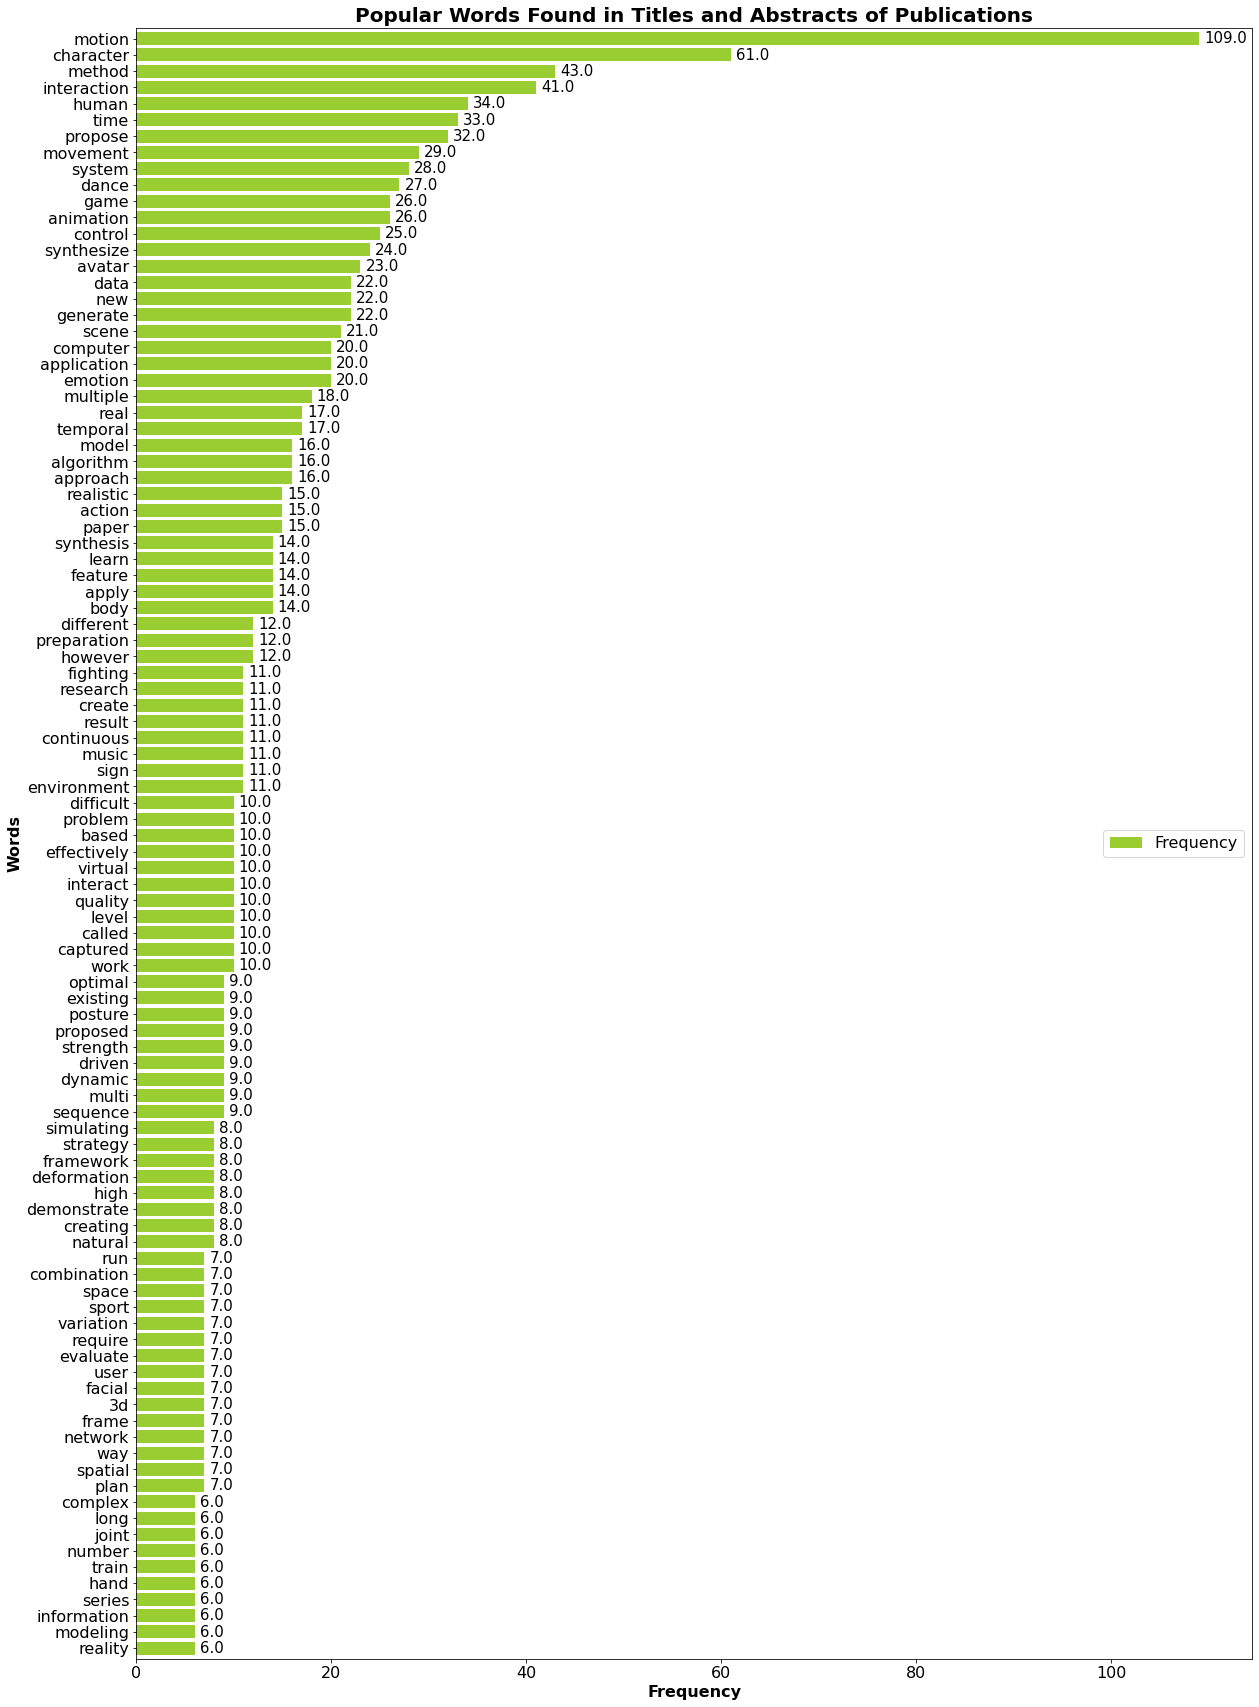

In [16]:
# STEP 7: VISUALIZE THE TOP 100 MOST COMMON WORDS USING MATPLOTLIB LIBRARY & WORD CLOUD

import matplotlib.pyplot as plt

# Set the plot size
fig, ax = plt.subplots(figsize=(20, 30))

# Plot horizontal bar graph
pop_words_df.sort_values(by='Frequency', ascending = True).plot.barh(x='Words',
                        width = 0.8,
                      y='Frequency',
                      ax=ax,
                      color= 'yellowgreen')

# Variable for drawing labels for each bar
rects = ax.patches

# Place a label for each each bar
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
   
    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',
        fontsize = 15               # Vertically center label
        )                    

# Set the title, labels, legends etc
ax.set_title("Popular Words Found in Titles and Abstracts of Publications",
             fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Frequency', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Words', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 16, loc = 7) # center right

plt.savefig('Mostpopularwords.png', dpi = 100, bbox_inches='tight')

plt.show()



# Visualizing 100 most popular words using WordCloud

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

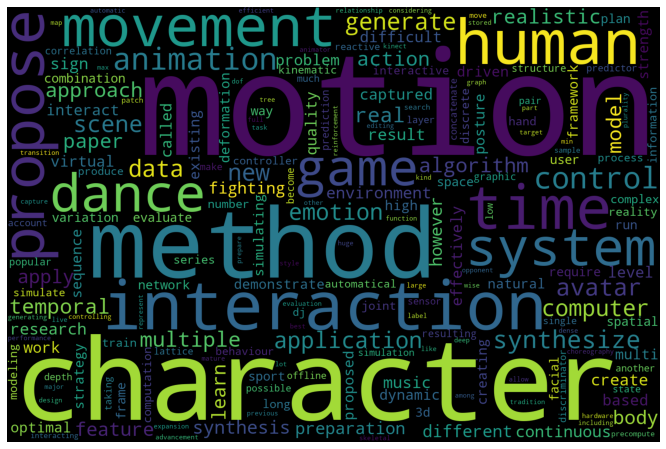

In [19]:
# Generate the data from the dictionary of words i.e., {word: frequency}
wordcloud = WordCloud(width = 1500, height = 1000).generate_from_frequencies(dict_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")


plt.savefig('wordcloud.png', bbox_inches='tight')

plt.show()
plt.close()

Design and implement the solution to use data analysis and visualization for analysing which authors collaborate (or appear) as co-authors in the publications.

In [20]:
# STEP 1: CREATE A LIST OF UNIQUE PAIRS OF AUTHORS FROM EACH PUBLICATION

# Creating a list of authors by splitting them using 'and' string
mainauthors = [authors.split('and') for authors in result.loc[:, 'AUTHOR']]

# An empty list to store a combination of authors
L_collabs = []

# Iterating through the main list of authors
for sublist in mainauthors:
    
    # Creating unique pairs of authors using tuples i.e., (author 1, author 2),
    # provided that the authors are different from each other
    # Stripping off the whitespaces
    pairs = [(author.strip(), coauthor.strip()) for author in sublist 
             for coauthor in sublist if author != coauthor]
    
    # For each pair of authors in the pairs list:
    for pair in pairs:
        # append this pair to the empty collaborations list
        L_collabs.append(pair)

print(L_collabs)
print(type(L_collabs))
print(type(L_collabs [0]))



[('Wang, He', 'Ho, Edmond S. L.'), ('Wang, He', 'Shum, Hubert P. H.'), ('Wang, He', 'Zhu, Zhanxing'), ('Ho, Edmond S. L.', 'Wang, He'), ('Ho, Edmond S. L.', 'Shum, Hubert P. H.'), ('Ho, Edmond S. L.', 'Zhu, Zhanxing'), ('Shum, Hubert P. H.', 'Wang, He'), ('Shum, Hubert P. H.', 'Ho, Edmond S. L.'), ('Shum, Hubert P. H.', 'Zhu, Zhanxing'), ('Zhu, Zhanxing', 'Wang, He'), ('Zhu, Zhanxing', 'Ho, Edmond S. L.'), ('Zhu, Zhanxing', 'Shum, Hubert P. H.'), ('Men, Qianhui', 'Ho, Edmond S. L.'), ('Men, Qianhui', 'Shum, Hubert P. H.'), ('Men, Qianhui', 'Leung, Howard'), ('Ho, Edmond S. L.', 'Men, Qianhui'), ('Ho, Edmond S. L.', 'Shum, Hubert P. H.'), ('Ho, Edmond S. L.', 'Leung, Howard'), ('Shum, Hubert P. H.', 'Men, Qianhui'), ('Shum, Hubert P. H.', 'Ho, Edmond S. L.'), ('Shum, Hubert P. H.', 'Leung, Howard'), ('Leung, Howard', 'Men, Qianhui'), ('Leung, Howard', 'Ho, Edmond S. L.'), ('Leung, Howard', 'Shum, Hubert P. H.'), ('Men, Qianhui', 'Shum, Hubert P. H.'), ('Men, Qianhui', 'Ho, Edmond S. L.'

In [21]:
print(len(L_collabs))

270


In [22]:
# STEP 2: COUNT THE FREQUENCY OF COLLABORATIONS

# Empty dictionary for storing collaborations
dict_collabs = {}

# Creating a dictionary of collaborations by iterating through the list
for i in L_collabs:
    
    # Sorting the arrangement of authors so that,
    # ('Ho, Edmond S. L.', 'Wang, He') == ('Wang, He','Ho, Edmond S. L.') and so on
    i = tuple(sorted(i)) 
    
    # If the tuple is in the dictionary
    if i in dict_collabs:
        
        # Add it to the empty dictionary
        dict_collabs[i] += 1
        
    # Otherwise, set the value to 1
    else:
        dict_collabs[i] = 1
        
print(dict_collabs)


{('Ho, Edmond S. L.', 'Wang, He'): 6, ('Shum, Hubert P. H.', 'Wang, He'): 6, ('Wang, He', 'Zhu, Zhanxing'): 2, ('Ho, Edmond S. L.', 'Shum, Hubert P. H.'): 20, ('Ho, Edmond S. L.', 'Zhu, Zhanxing'): 2, ('Shum, Hubert P. H.', 'Zhu, Zhanxing'): 2, ('Ho, Edmond S. L.', 'Men, Qianhui'): 4, ('Men, Qianhui', 'Shum, Hubert P. H.'): 4, ('Leung, Howard', 'Men, Qianhui'): 4, ('Ho, Edmond S. L.', 'Leung, Howard'): 4, ('Leung, Howard', 'Shum, Hubert P. H.'): 6, ('Chan, Jacky C. P.', 'Shum, Hubert P. H.'): 2, ('Chan, Jacky C. P.', 'Wang, He'): 2, ('Chan, Jacky C. P.', 'Yi, Li'): 2, ('Chan, Jacky C. P.', 'Wei, Wei'): 2, ('Chan, Jacky C. P.', 'Ho, Edmond S. L.'): 2, ('Shum, Hubert P. H.', 'Yi, Li'): 4, ('Shum, Hubert P. H.', 'Wei, Wei'): 2, ('Wang, He', 'Yi, Li'): 4, ('Wang, He', 'Wei, Wei'): 2, ('Wei, Wei', 'Yi, Li'): 2, ('Ho, Edmond S. L.', 'Yi, Li'): 4, ('Ho, Edmond S. L.', 'Wei, Wei'): 2, ('Iwamoto, Naoya', 'Shum, Hubert P. H.'): 8, ('Asahina, Wakana', 'Iwamoto, Naoya'): 4, ('Iwamoto, Naoya', 'Mor

In [23]:
print(len(dict_collabs))

75


In [24]:
# STEP 3: STORE THE RESULTS IN A DATAFRAME

# Creating a dataframe
collabs_df = pd.DataFrame.from_dict(dict_collabs, orient = 'index').reset_index()

# Renaming columns
collabs_df = collabs_df.rename(columns = {'index':'Collaboration', 0:'Frequency'} )

collabs_df



,Collaboration,Frequency
0,"(Ho, Edmond S. L., Wang, He)",6
1,"(Shum, Hubert P. H., Wang, He)",6
2,"(Wang, He, Zhu, Zhanxing)",2
3,"(Ho, Edmond S. L., Shum, Hubert P. H.)",20
4,"(Ho, Edmond S. L., Zhu, Zhanxing)",2
...,...,...
70,"(Shum, Hubert P. H., Yadav, Pranjul)",2
71,"(Komura, Taku, Yadav, Pranjul)",2
72,"(Shiraishi, Masashi, Shum, Hubert P. H.)",2
73,"(Komura, Taku, Shiraishi, Masashi)",2


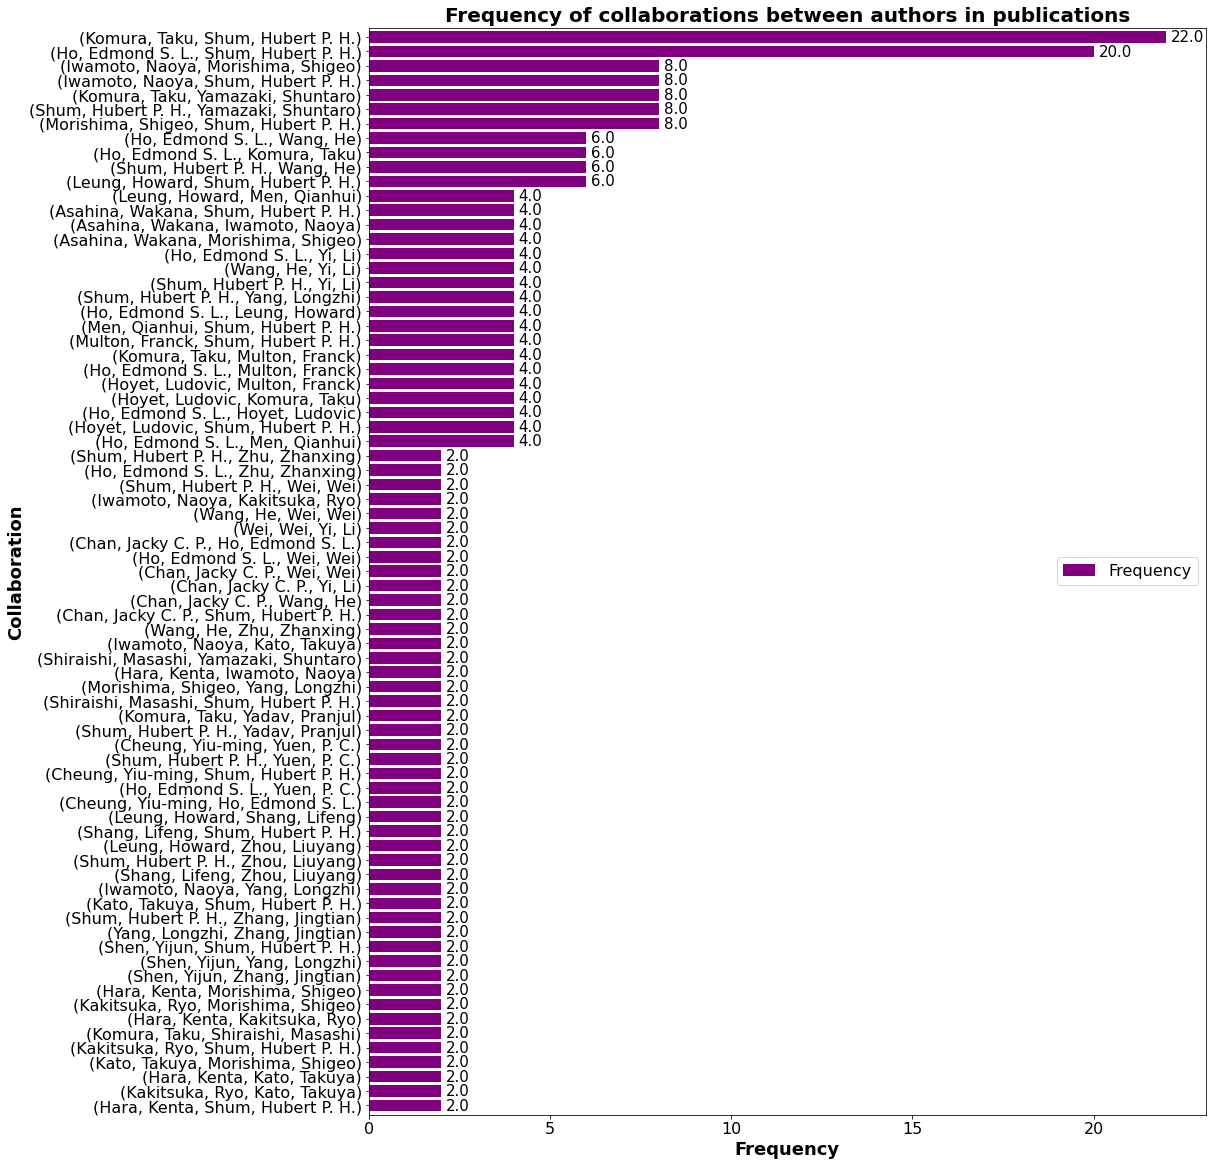

In [25]:
# STEP 4: VISUALIZE THE RESULTS USING MATPLOTLIB LIBRARY

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 20))
x_labels = [collabs_df['Frequency']]

# Plot horizontal bar graph

collabs_df.sort_values(by='Frequency').plot.barh(x='Collaboration',
                      y='Frequency', ax=ax, width = 0.8,
                    color = 'purple')

# Variable for drawing labels for each bar
rects = ax.patches

# Place a label for each each bar
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
   
    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',
        fontsize = 15               # Vertically center label
        )                    

# Set axes title and labels
ax.set_title("Frequency of collaborations between authors in publications", fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Frequency', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Collaboration', fontsize = 18, fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 16, loc = 7) 


plt.savefig("collabs.png", dpi = 100, bbox_inches = 'tight')

plt.show()



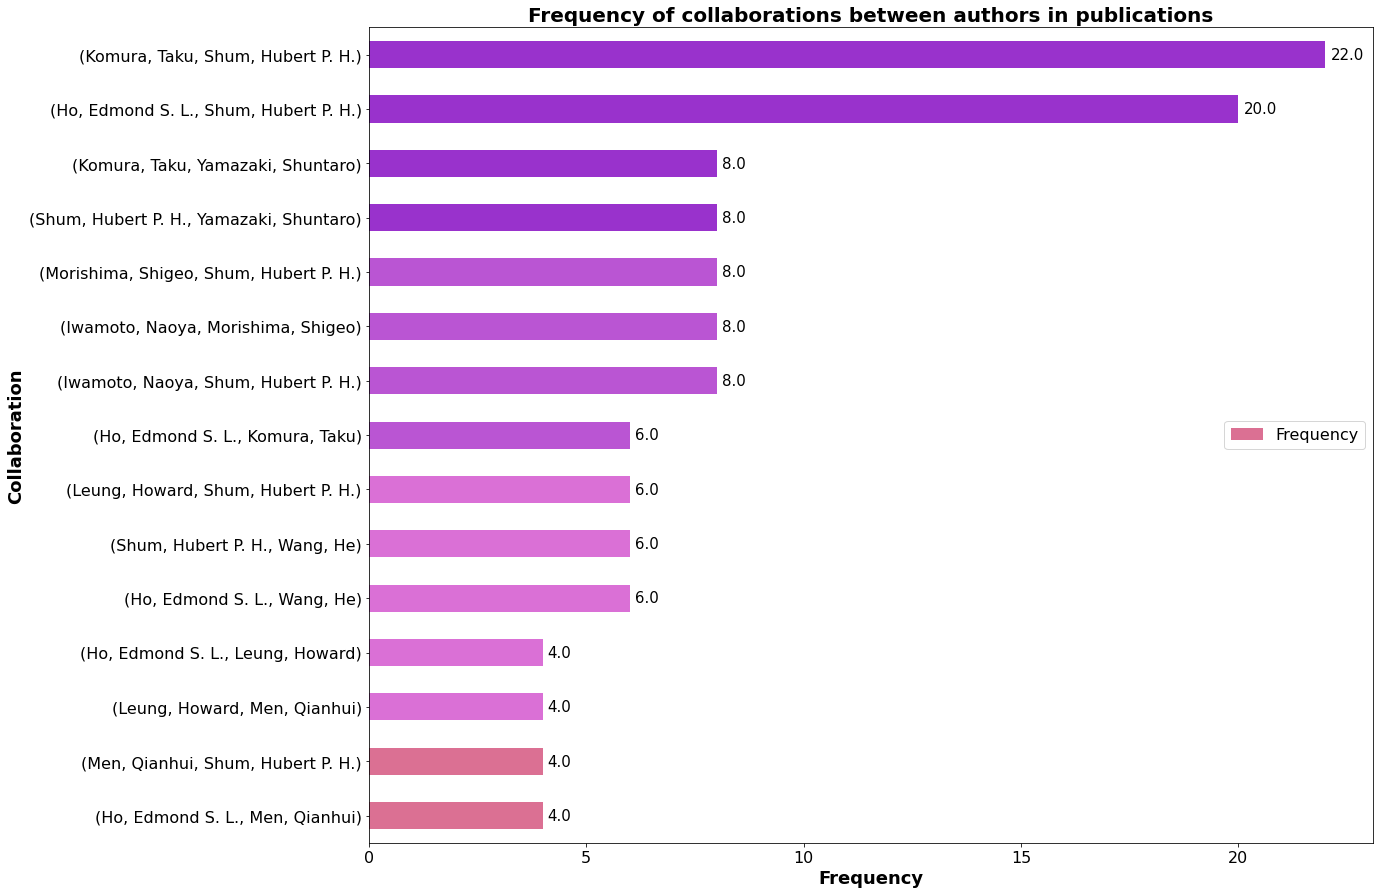

In [26]:
# STEP 5: ZOOMING THE TOP 15 MOST COLLABORATIONS

# Top 15 most common collabs
most_common_collabs_df = pd.DataFrame(most_common(dict_collabs, 15)).rename(columns = {0: 'Collaborations',
                                                                                        1: 'Frequency'})
# Get the frequencies
frequencies = [freq for freq in most_common_collabs_df['Frequency']]

# Empty list for storing dictinct colours for each frequency
col = []

# Loop through the frequency to append colour
for freq in frequencies:
    if freq == 4:
        col.append('darkorchid')
    elif freq == 6:
        col.append('mediumorchid')
    elif freq == 8:
        col.append('orchid')
    else:
        col.append('palevioletred')

# Plot the figure.
fig, ax = plt.subplots(figsize=(18, 15))
most_common_collabs_df.sort_values(by='Frequency').plot.barh(x='Collaborations',
                       ax=ax, y = 'Frequency', 
                    color = col)

# Variable for drawing labels for each bar
rects = ax.patches

# Place a label for each each bar
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
   
    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',
        fontsize = 15               # Vertically center label
        )                    
                                   
# Add axes label and title
ax.set_title("Frequency of collaborations between authors in publications", fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Frequency', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Collaboration', fontsize = 18, fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 16, loc = 7) 
plt.savefig("image.png", dpi = 100, bbox_inches = 'tight')

plt.show()

Design and implement the solution to use data analysis and visualization for analysing 
how the features of a publication would affect its “citation” (a value that can be found in the 
publication detail pages).

In [27]:
# Getting relevant columns for analysis
df = result.loc[:, ['TITLE', 'IMPACT FACTOR', 'CITATION']]

# Dropping missing values
new_df = df.dropna().sort_values(by = ['IMPACT FACTOR']).reset_index().drop(columns = ['index'])

new_df

,TITLE,IMPACT FACTOR,CITATION
0,A Generic Framework for Editing and Synthesizi...,1.020,6
1,Human Motion Variation Synthesis with Multivar...,1.020,6
2,Natural Preparation Behavior Synthesis,1.020,1
3,Angular Momentum Guided Motion Concatenation,1.020,11
4,Multi-layer Lattice Model for Real-Time Dynami...,2.078,14
5,Topology Aware Data-Driven Inverse Kinematics,2.078,26
6,Spatio-temporal Manifold Learning for Human Mo...,4.579,74
7,Simulating Multiple Character Interactions wit...,4.579,68
8,A Quadruple Diffusion Convolutional Recurrent ...,4.685,13
9,Interaction Patches for Multi-Character Animation,5.414,125


## Feature 1: The relationship between impact factor and citations

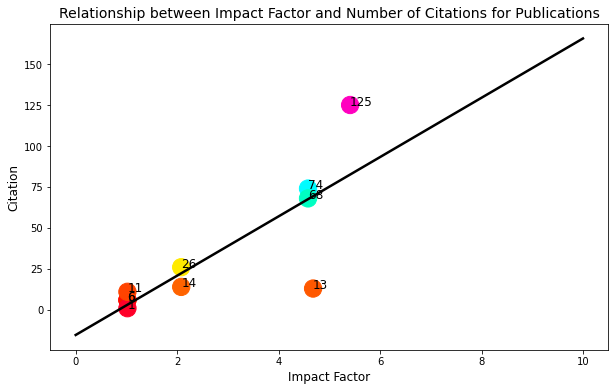

In [28]:
# FEATURE 1: THE RELATIONSHIP BETWEEN IMPACT FACTOR AND CITATIONS

import numpy as np
# My x,y coordinate data
x = new_df['IMPACT FACTOR'].astype(float).round(2)
y = new_df['CITATION'].astype(int)


# Create a scatterplot
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x, y,
           s = 300,
           c = y, 
           cmap = 'gist_rainbow')

# Annotate points with y values, i.e. number of citations
for index in range(len(x)):
    ax.text(x[index], y[index], y[index], size = 12)

# Add title and labels
ax.set_title('Relationship between Impact Factor and Number of Citations for Publications', fontsize = 14)
ax.set_xlabel('Impact Factor', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


plt.savefig("feature1.png", dpi = 100, bbox_inches = 'tight')

# Display plot
plt.show()


## Feature 2: The relationship between the age of publication and citations

In [29]:
# FEATURE 2: RELATIONSHIP BETWEEN THE AGE OF PUBLICATION AND THE NUMBER OF CITATIONS

# getting a new datafame consisting of only title, citation, and year of publication
feature2_df = result.loc[:, ['TITLE', 'YEAR', 'CITATION']].dropna()

feature2_df['YEAR'] = feature2_df['YEAR'].astype(int)
feature2_df['CITATION'] = feature2_df['CITATION'].astype(int)

feature2_df = feature2_df.sort_values(by = ['YEAR']).reset_index().drop(columns = ['index'])

feature2_df

,TITLE,YEAR,CITATION
0,Generating Realistic Fighting Scenes by Game Tree,2006,6
1,Simulating Competitive Interactions using Sing...,2007,45
2,Simulating Interactions of Avatars in High Dim...,2008,45
3,Interaction Patches for Multi-Character Animation,2008,125
4,Angular Momentum Guided Motion Concatenation,2009,11
5,Simulating Interactions Among Multiple Characters,2010,1
6,Real-time Physical Modelling of Character Move...,2012,68
7,Simulating Multiple Character Interactions wit...,2012,68
8,Preparation Behaviour Synthesis with Reinforce...,2013,2
9,Natural Preparation Behavior Synthesis,2013,1


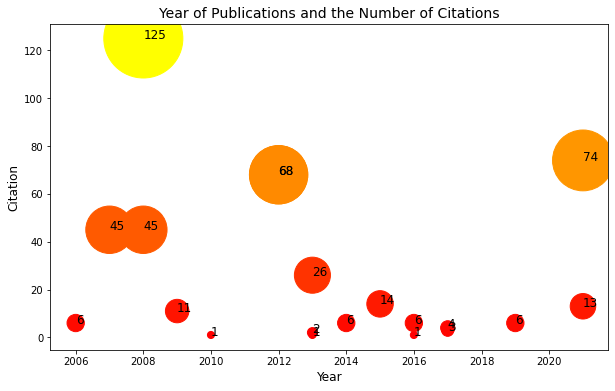

In [30]:
# Set the x, y values and size of the scatterpoints based on the y values
x = feature2_df['YEAR']
y = feature2_df['CITATION']
s = [n*50 for n in y]

# Create a scatterplot
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x, y,
           s = s,
           c = y,
           cmap = 'autumn')

# Annotate points with y values, i.e. number of citations
for index in range(len(x)):
    ax.text(x[index], y[index], y[index], size = 12)

# Add title and labels
ax.set_title('Year of Publications and the Number of Citations', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)

# Change the size of axes and lables
plt.tick_params(axis = 'both', labelsize = 10)

plt.savefig("feature2.png", dpi = 100, bbox_inches = 'tight')

plt.show()



## Feature 3 & 4: The relationship between the title/abstract length with citations

In [31]:
# FEATURE 3 & 4: LENGTH OF TITLE AND ABSTRACTS VS CITAIIONS

# getting list of title and abstract length using list comprehension
len_title = [len(title) for title in result.loc[:, 'TITLE'] ]
len_abstract = [len(abstract) for abstract in result.loc[:, 'ABSTRACT'] ]

# creating dataframe for each
df1 = pd.DataFrame(result.loc[:, 'CITATION'])
df2 = pd.DataFrame(len_title, columns = ['Title length'])
df3 = pd.DataFrame(len_abstract, columns = ['Abstract length'])

# concatenating dataframes for separate analysis
feature3_df = pd.concat([df1, df2], axis = 1).dropna().astype(int)
feature4_df = pd.concat([df1, df3], axis = 1).dropna().astype(int)



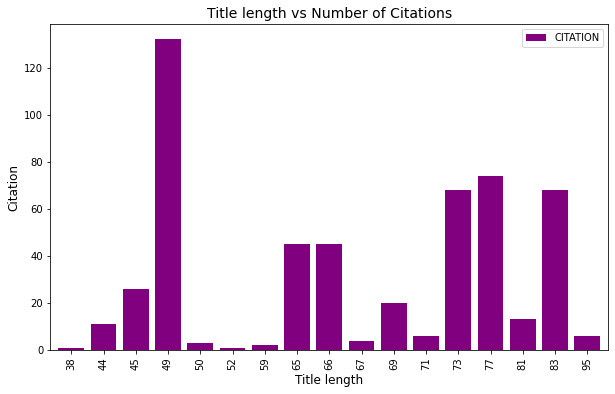

In [32]:

# drawing bar chart
fig, ax = plt.subplots(figsize = (10, 6))
feature3_df.groupby('Title length').sum().plot(kind = 'bar',
                       ax=ax, width = 0.8,color = 'purple')

# setting labels, axes, etc
ax.set_title('Title length vs Number of Citations', fontsize = 14)
ax.set_xlabel('Title length', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)



plt.savefig("feature3.png", dpi = 100, bbox_inches = 'tight')

plt.show()

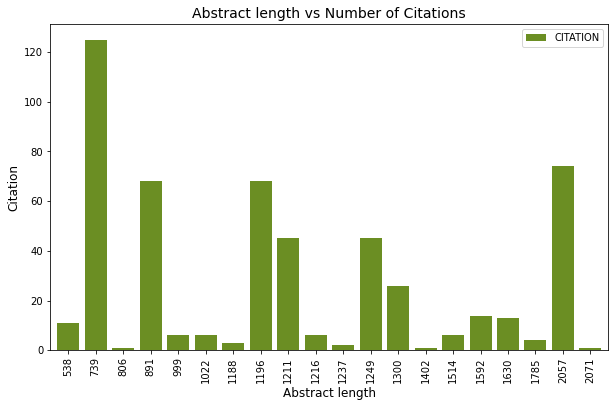

In [33]:
# drawing bar chart
fig, ax = plt.subplots(figsize = (10, 6))

# sorting the abstract length
feature4_df.sort_values(by='Abstract length').plot.bar(x='Abstract length',
                      y='CITATION', ax=ax, width = 0.8, color = 'olivedrab')

# setting axes, labels, etc
ax.set_title('Abstract length vs Number of Citations', fontsize = 14)
ax.set_xlabel('Abstract length', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)



plt.savefig("feature4.png", dpi = 100, bbox_inches = 'tight')

plt.show()


## Feature 5: The relationship between publisher and citations

In [34]:
# FEATURE 5: THE PUBLISHER VS NUMBER OF CITAITON

# getting data from publisher column
publisher = [publish for publish in result.loc[:, 'PUBLISHER'].dropna()]

# creating dataframes for each citation column and publisher
df1 = pd.DataFrame(result.loc[:, 'CITATION'].dropna().astype(int))
df2 = pd.DataFrame(publisher, columns = ['Publisher'])

feature5_df = pd.concat([df1, df2], axis = 1)

# grouping the citations by the publishers
feature5_df.groupby('Publisher').sum()       

,CITATION
Publisher,
ACM,63.0
Elsevier,0.0
Eurographics Association,0.0
IEEE,88.0
John Wiley and Sons Ltd.,59.0
Springer International Publishing,3.0
Springer-Verlag,125.0
University of Edinburgh,68.0
WO Patent WO/2010/057897,68.0


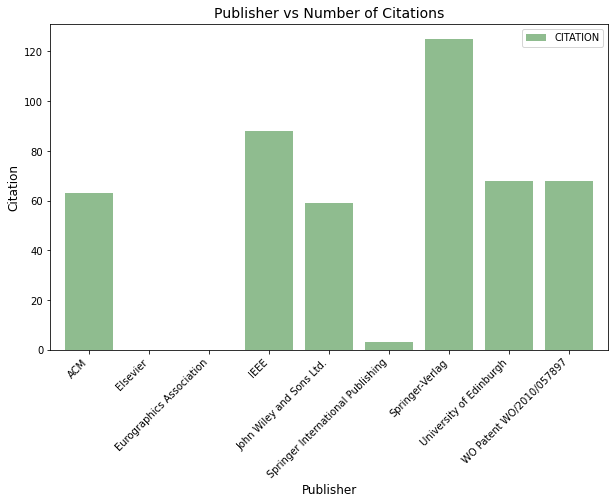

In [35]:
 
# drawing bar chart
fig, ax = plt.subplots(figsize=(10, 6))
feature5_df.groupby('Publisher').sum().plot(kind = 'bar', ax = ax, 
                                           width = 0.8,

                                            color = 'darkseagreen')

# creating a list of xticklabels 
xtickslabels = ['ACM', 'Elsevier', 'Eurographics Association', 'IEEE',
               'John Wiley and Sons Ltd.', 'Springer International Publishing',
               'Springer-Verlag', 'University of Edinburgh', 'WO Patent WO/2010/057897']

# setting labels, axes, etc
ax.set_xticklabels(xtickslabels, rotation = 45, ha="right")
ax.set_title('Publisher vs Number of Citations', fontsize = 14)
ax.set_xlabel('Publisher', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)


plt.savefig("feature5.png", dpi = 100, bbox_inches = 'tight')
plt.show()


## Feature 6: The relationship between number of similar research and citations

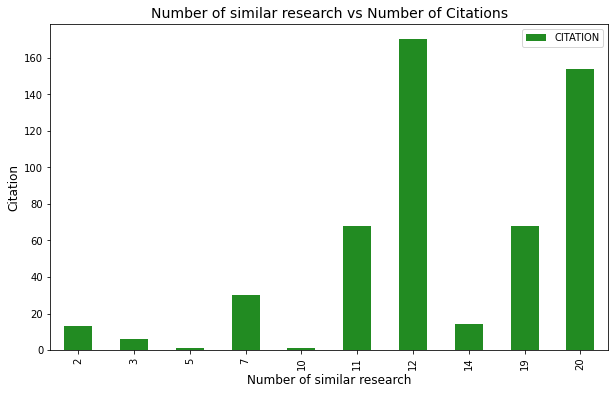

In [36]:
# FEATURE 6: THE NUMBER OF SIMILAR RESEARCH VS CITATION

# getting a list of similar research
s = [s for s in result.loc[:, 'SIMILAR RESEARCH'].dropna()]

# getting a list of number of similar research of each publication page
# and creating a dataframe
num_sim_research = pd.DataFrame([len(i.split(',')) for i in s], columns = ['Number of similar research'])

# concatenating citation dataframe with num_of_research dataframe
feature6_df = pd.concat([num_sim_research, df1], axis = 1).dropna()

# drawing bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# grouping by number of similar research
feature6_df.groupby('Number of similar research').sum().plot(kind = 'bar', 
                 ax = ax, color = 'forestgreen')

# setting labels, axes, etc
ax.set_title('Number of similar research vs Number of Citations', fontsize = 14)
ax.set_xlabel('Number of similar research', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)


plt.savefig("feature6.png", dpi = 100, bbox_inches = 'tight')

plt.show()

## Feature 7: The relationship between number of collaborations and citations

In [37]:
# FEATURE 7: NUMBER OF COLLOBORATIONS AND CITATION

# getting a list of authors from the AUTHOR column
authors = [authors for authors in result.loc[:, 'AUTHOR'].dropna()]

# getting a list of number of authors of each publication page
# by splitting them viw 'and' string
# and creating a dataframe, renaming the column
authors_len = pd.DataFrame([len(i.split('and')) for i in authors], columns = ['Authors number'])

authors_len


# concatenating it with citation column
feature7_df = pd.concat([authors_len, df1], axis = 1).dropna()

feature7_df


,Authors number,CITATION
0,4,74.0
1,4,13.0
3,6,6.0
5,6,4.0
6,4,3.0
7,4,6.0
8,4,1.0
9,4,14.0
10,4,6.0
11,4,26.0


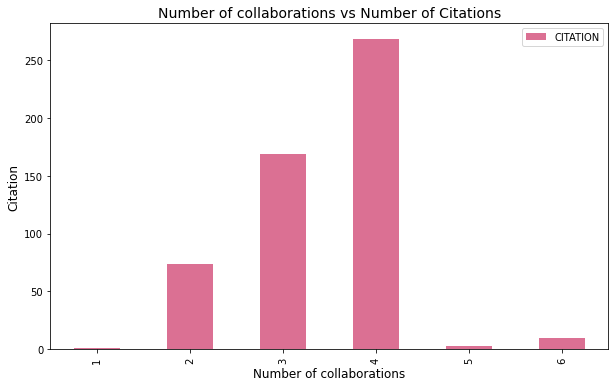

In [38]:
# drawing bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# grouping the authors number
feature7_df.groupby('Authors number').sum().plot(kind = 'bar',  ax = ax, color = 'palevioletred')

# setting the labels, axes, etc
ax.set_title('Number of collaborations vs Number of Citations', fontsize = 14)
ax.set_xlabel('Number of collaborations', fontsize = 12)
ax.set_ylabel('Citation', fontsize = 12)

plt.savefig("feature7.png", dpi = 100, bbox_inches = 'tight')

plt.show()

